# MissiePlots: logl tutorial
## *Ploting 2D log likelihood maps with significances*

In [1]:
### Adds the MissiePlots directory to the system path ###
import os
import sys
sys.path.append(os.path.abspath(".."))

import numpy as np

### If you add the directory above MissiePlots to the system path instead, use MissiePlots.logl ###
from logl import SigmaMap, logl_to_sig

### Generating an array to plot

In [2]:
x = np.arange(-5,5,0.5)
y = np.arange(-5,5,0.4)

scales = {0:x, 1:y}
data = -np.exp(((y[np.newaxis, :])**2 + (x[:, np.newaxis])**2)/30) + 1

## Specifying a function to convert between loglikelihood and significance

### logl_to_sig information

Returns a function that converts the array of log likelihoods to significance. </br>
`logl_to_sig(DOF, zero_point)` </br>
zero_point (float) is the log likelihood of the null model and DOF (int) is the difference in the number of degrees of freedom between the null model and the alternative model. </br>
	
**What is it doing?**</br>
The exact code is: </br>
`stats.norm.isf((1 - stats.chi2.cdf(2*(array-zero_point), dof))/2)` </br>
where `stats.norm.isf` is the Inverse survival function of a normal distribution and `stats.chi2.cdf` is the Cumulative distribution function of a chi squared distribution. </br>
</br>
This may not be the correct way to convert from log likelihood to significance. 

In [3]:
func = logl_to_sig(6,-4)

## The SigmaMap function: plotting cube slices in 3D

### Quick start:
Taking the loglikelihood array as an input, the only other information this funcion requires is the function to convert this array into significance. This function takes the array of log likelihoods as it's only input.

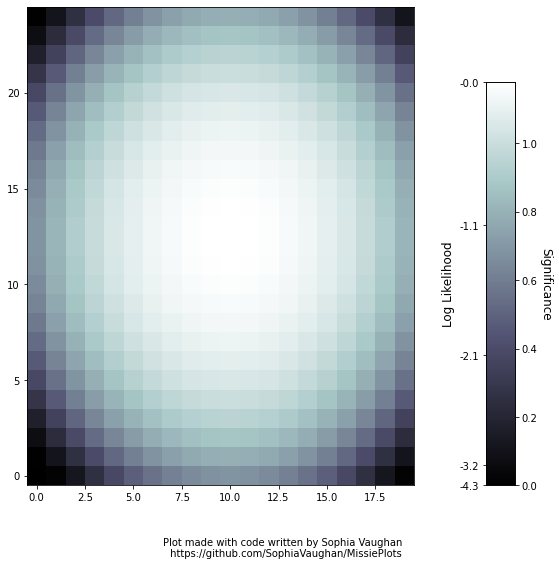

In [4]:
SigmaMap(data, func)

### Keyword arguments:
There are a lot of keyword arguments that can be supplied to this code. Examples for all of them are as follows. </br>
**scales:** To alter the x,y scales on the plot pass a dictionary to the scales keyword with the keys 0,1 leading to arrays for the x,y value of the array along that axis. The length must therefore be the same as the length of the array along that axis. </br>
**saveloc:** default: './' - a string specifying the save location for the plot. </br>
**savename:** default: None - a string for the file name (no extention needed) or None if the plot is to been shown instead of saves. </br>
**figsize:** default: (8,8) - a tuple (a,b) where a, b are numbers specifying the figsize. </br>
**font_scale:** default: 1 - an overall scaling for the fontsizes (not recomended to change). </br>
**title:** the title of the plot (str). </br>
**xlabel, ylabel, zlabel, siglabel, logllabel:** the labels for the axis and colorbar respectivly (str). </br>
**xticks, yticks, zticks, sigticks, loglticks:**  the ticks to display for each axis/colorbar (list, np.array). </br>
**xlim, ylim, zlim, siglim:**  a length two list with the lower and upper limits of the axis/colorbar. Warning: no cliping is done for the 3d plot so the slices may spill off the edge of the axis. </br>
**markpoints** points to mark on the plots. These are specified in a list of tuples of length 2 containing the coordinates of the point to mark. The two numbers specify the scaled coordinates of point to mark on the x and y axis of the plot respectivly (see example). </br>
**cmap:** default: plt.cm.bone - The matplotlib colormap to us. </br>
**norm:** default: None - the normalisation of the colormap. </br>

In [5]:
# Because I am lazy I am passing this as dict but you don't have to
keywordexamples = {
    'figsize':(8,6),
    'title':'What a lovely plot!',
    'font_scale':1,
    'xlabel':'The x axis',
    'ylabel':'why?......',
    'yticks':[-3,0,3],
    'loglticks':[-1,-2,-3,-4],
    'siglabel':"It's colour not color",
    'markpoints':[(1, 1), (0,0)],
    'norm':np.arange(0,1.1,0.1)
    }

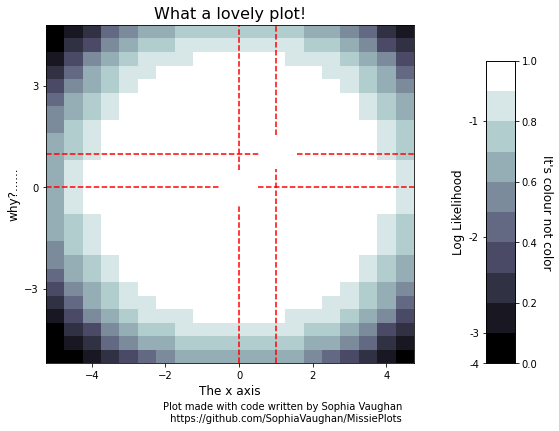

In [6]:
SigmaMap(data, func, scales=scales, **keywordexamples)